# Análisis Inteligente de Condiciones de Cultivo con Python
### Autor: Cristian Rodríguez

Este notebook simula un caso real de análisis de datos de sensores agrícolas, donde se detectan eventos de estrés térmico
en base a condiciones de temperatura y humedad. Utiliza herramientas de ciencia de datos como Pandas, Seaborn y Matplotlib
para explorar, visualizar y generar alertas automatizadas. Está desarrollado como parte de mi formación como Ingeniero Electrónico
con orientación en Inteligencia Artificial aplicada al agro.

In [1]:
# 1. Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2. Cargar dataset de sensores
df = pd.read_csv("sensores_cultivo.csv")
df.head()

,dia,hora,temperatura,humedad,evento
0,2025-07-01,8,24,50,OK
1,2025-07-01,9,37,62,CRITICO
2,2025-07-01,10,32,41,OK
3,2025-07-01,11,28,51,OK
4,2025-07-01,12,25,73,OK


In [3]:
# 3. Estadísticas descriptivas
print("Columnas:", df.columns.tolist())
print("Dimensiones del dataset:", df.shape)
df.describe()

Columnas: ['dia', 'hora', 'temperatura', 'humedad', 'evento']
Dimensiones del dataset: (24, 5)


,hora,temperatura,humedad
count,24.000000,24.000000,24.000000
mean,13.500000,30.583333,54.083333
std,3.526299,7.868024,14.070990
min,8.000000,19.000000,32.000000
25%,10.750000,24.000000,43.750000
50%,13.500000,28.500000,52.500000
75%,16.250000,38.000000,66.500000
max,19.000000,41.000000,78.000000


In [4]:
# 4. Promedios por día
df.groupby("dia")[["temperatura", "humedad"]].mean()

,temperatura,humedad
dia,,
2025-07-01,31.750000,56.833333
2025-07-02,29.416667,51.333333


In [5]:
# 5. Definición de umbrales críticos y creación de etiqueta
TEMP_CRITICA = 30
HUM_CRITICA = 40
df["estres_termico"] = (df["temperatura"] > TEMP_CRITICA) & (df["humedad"] < HUM_CRITICA)

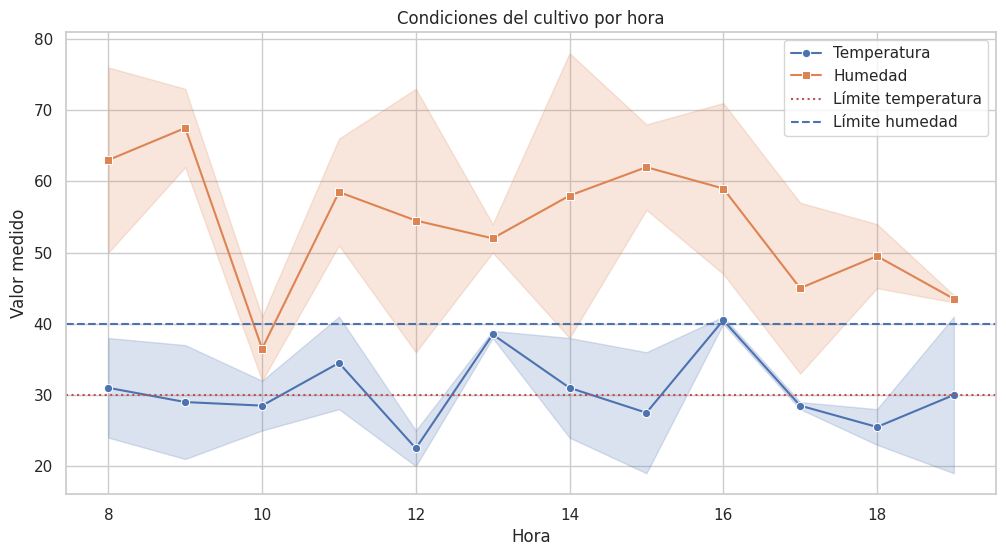

In [6]:
# 6. Visualización: evolución horaria
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.lineplot(x="hora", y="temperatura", data=df, label="Temperatura", marker="o")
sns.lineplot(x="hora", y="humedad", data=df, label="Humedad", marker="s")
plt.axhline(TEMP_CRITICA, color='r', linestyle=':', label="Límite temperatura")
plt.axhline(HUM_CRITICA, color='b', linestyle='--', label="Límite humedad")
plt.title("Condiciones del cultivo por hora")
plt.xlabel("Hora")
plt.ylabel("Valor medido")
plt.legend()
plt.grid(True)
plt.show()

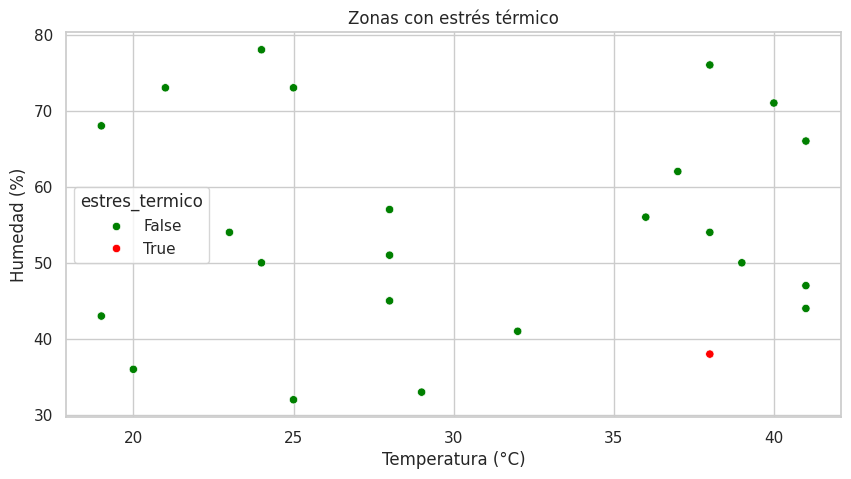

In [7]:
# 7. Visualización: zonas con estrés térmico
plt.figure(figsize=(10,5))
sns.scatterplot(x="temperatura", y="humedad", hue="estres_termico", data=df,
                palette={True: "red", False: "green"})
plt.title("Zonas con estrés térmico")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Humedad (%)")
plt.grid(True)
plt.show()

In [8]:
# 8. Exportar eventos de alerta
alertas = df[df["estres_termico"] == True]
alertas.to_csv("alertas_estres.csv", index=False)
print(f"Se registraron {len(alertas)} eventos con estrés térmico.")

Se registraron 1 eventos con estrés térmico.


###  Conclusión
Este análisis permite detectar de forma visual y automatizada condiciones críticas en el cultivo, mejorando la toma de decisiones.
Puede adaptarse fácilmente a otras variables o escalas productivas. Forma parte de un portafolio profesional orientado a IA aplicada.

##  Cargar datos actualizados (incluye pH del suelo)

In [9]:
df = pd.read_csv('sensores_cultivo_actualizado.csv')
df.head()

,Fecha,Temperatura (°C),Humedad (%),pH del Suelo
0,2024-01-01,26.490142,62.923146,6.571557
1,2024-01-02,24.585207,67.896773,6.612157
2,2024-01-03,26.943066,68.286427,6.716610
3,2024-01-04,29.569090,65.988614,6.710760
4,2024-01-05,24.297540,69.193571,6.224466


##  Estadísticas descriptivas actualizadas

In [10]:
df.describe()

,Temperatura (°C),Humedad (%),pH del Suelo
count,100.000000,100.000000,100.000000
mean,24.688460,70.111523,6.512979
std,2.724505,4.768345,0.216857
min,17.140765,60.406144,5.851747
25%,23.197283,65.971697,6.368911
50%,24.619131,70.420536,6.519539
75%,26.217856,72.690852,6.640887
max,30.556835,83.600846,7.270546


##  Visualización completa: Humedad, Temperatura y pH

<ipython-input-11-1776d8928b19>:10: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-1776d8928b19>:10: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-1776d8928b19>:10: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127777 (\N{THERMOMETER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


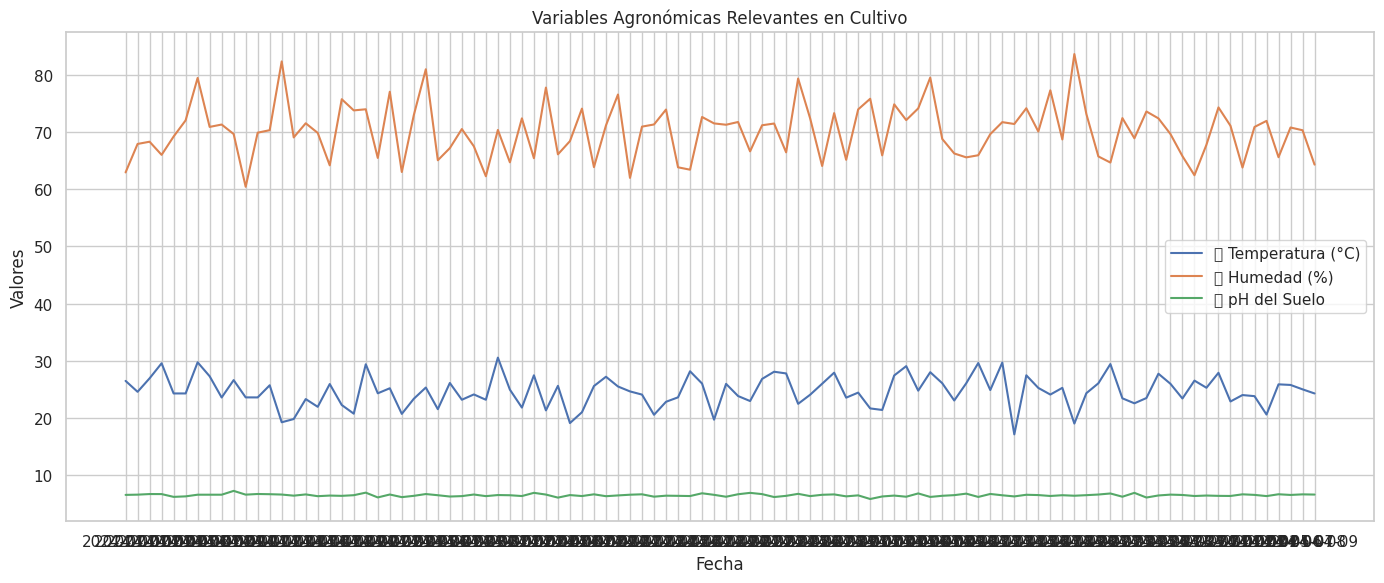

In [11]:
plt.figure(figsize=(14, 6))
plt.plot(df['Fecha'], df['Temperatura (°C)'], label='🌡️ Temperatura (°C)')
plt.plot(df['Fecha'], df['Humedad (%)'], label='💧 Humedad (%)')
plt.plot(df['Fecha'], df['pH del Suelo'], label='🧪 pH del Suelo')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.title('Variables Agronómicas Relevantes en Cultivo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()